In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

In [ ]:

df=pd.read_csv("/content/job_placement.csv")

In [ ]:
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [ ]:
df.describe()

,id,age,salary,gpa,years_of_experience
count,700.00000,700.000000,700.000000,700.000000,699.000000
mean,350.50000,24.411429,52474.285714,3.750429,2.177396
std,202.21688,1.164268,25160.331005,0.121212,0.779393
min,1.00000,23.000000,0.000000,3.400000,1.000000
25%,175.75000,23.000000,61000.000000,3.700000,2.000000
50%,350.50000,24.000000,64000.000000,3.800000,2.000000
75%,525.25000,26.000000,66000.000000,3.900000,3.000000
max,700.00000,26.000000,68000.000000,3.900000,3.000000


In [ ]:
df.isnull().sum()

id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df.set_index('name', inplace=True)

In [ ]:
df.drop(["id","degree"],axis=1,inplace=True)

In [ ]:
df

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
name,,,,,,,,
John Doe,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
Jane Smith,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
Michael Johnson,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
Emily Davis,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0
David Brown,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
Lucas Taylor,Male,23,Computer Science,University of Washington,Placed,67000,3.8,3.0
Emma Martinez,Female,26,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
Aiden Davis,Male,24,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, John Doe to Jack Garcia
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               700 non-null    object 
 1   age                  700 non-null    int64  
 2   stream               700 non-null    object 
 3   college_name         700 non-null    object 
 4   placement_status     700 non-null    object 
 5   salary               700 non-null    int64  
 6   gpa                  700 non-null    float64
 7   years_of_experience  699 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 65.4+ KB


In [ ]:
df.columns

Index(['gender', 'age', 'stream', 'college_name', 'placement_status', 'salary',
       'gpa', 'years_of_experience'],
      dtype='object')

In [ ]:
df["years_of_experience"].unique()

array([ 2.,  1.,  3., nan])

In [ ]:
df["gpa"].unique()

array([3.7, 3.6, 3.8, 3.5, 3.9, 3.4])

In [ ]:
continous_column=["salary"]
category_column=['gender', 'age', 'stream', 'college_name', 'placement_status',
       'gpa', 'years_of_experience']

In [ ]:
df["years_of_experience"].fillna(0,inplace=True)

**Hypothesis testing**

In [ ]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [ ]:
res=[]
for i in continous_column:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,salary,52474.285714,50916.0,H0-There is no significant difference,-0.830285,0.413659


In [ ]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [ ]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [ ]:
Category=category_column
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,gender&age,There is relationship between two mentioned column
1,gender&stream,There is relationship between two mentioned column
2,gender&college_name,There is relationship between two mentioned column
3,gender&placement_status,There is no relationship between two mentioned column
4,gender&gpa,There is relationship between two mentioned column
5,gender&years_of_experience,There is relationship between two mentioned column
6,age&stream,There is relationship between two mentioned column
7,age&college_name,There is relationship between two mentioned column
8,age&placement_status,There is no relationship between two mentioned column
9,age&gpa,There is relationship between two mentioned column


In [ ]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [ ]:
Category=category_column
continous=continous_column
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,salary&gender,There is relationship between mentioned column
1,salary&age,There is relationship between mentioned column
2,salary&stream,There is no relationship between mentioned column
3,salary&college_name,There is no relationship between mentioned column
4,salary&placement_status,There is no relationship between mentioned column
5,salary&gpa,There is no relationship between mentioned column
6,salary&years_of_experience,There is no relationship between mentioned column


In [ ]:
df.head()

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
name,,,,,,,,
John Doe,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
Jane Smith,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
Michael Johnson,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
Emily Davis,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0
David Brown,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [ ]:
encode=OrdinalEncoder()
df["gender"]=encode.fit_transform(df[["gender"]])
df["stream"]=encode.fit_transform(df[["stream"]])
df["college_name"]=encode.fit_transform(df[["college_name"]])
df["placement_status"]=encode.fit_transform(df[["placement_status"]])


In [ ]:
df.head()

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
name,,,,,,,,
John Doe,1.0,25,0.0,5.0,1.0,60000,3.7,2.0
Jane Smith,0.0,24,1.0,7.0,1.0,65000,3.6,1.0
Michael Johnson,1.0,26,4.0,11.0,1.0,58000,3.8,3.0
Emily Davis,0.0,23,3.0,43.0,0.0,0,3.5,2.0
David Brown,1.0,24,0.0,9.0,1.0,62000,3.9,2.0


In [ ]:
total_wcss=[]
for i in range(1,50):
  model=KMeans(i)
  model.fit(df)
  total_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
total_wcss

[442496600511.2073,
 2894652673.8839912,
 742758985.5419884,
 369477785.49566054,
 194245153.90970197,
 113132803.55351713,
 77227705.94033825,
 47899408.67352059,
 29397109.765953008,
 14512476.455383256,
 3236257.029385835,
 536043.7210525,
 36032.176052499686,
 27637.375726205064,
 20967.00825977861,
 18161.888229343367,
 15349.195751737978,
 13532.087823790109,
 12109.852252435634,
 10364.716410217268,
 9451.707015020562,
 8394.208202627304,
 7838.274580602479,
 6747.776520371068,
 6621.959140482726,
 5989.981753065326,
 5553.296679169572,
 5337.534723190032,
 4836.353025174145,
 4506.895153786339,
 4354.35141365426,
 4072.0225690554403,
 3874.388197243674,
 3669.9296345618177,
 3328.9189577655716,
 3242.2540406536223,
 2929.4373450457797,
 2928.43217852455,
 2811.6583515388465,
 2726.8089994945763,
 2594.5692047578223,
 2452.0865088368046,
 2405.862242257449,
 2259.1374509497705,
 2230.464238976043,
 2162.0587678003903,
 2092.2751078002834,
 1989.6172265369373,
 1956.568302344926]

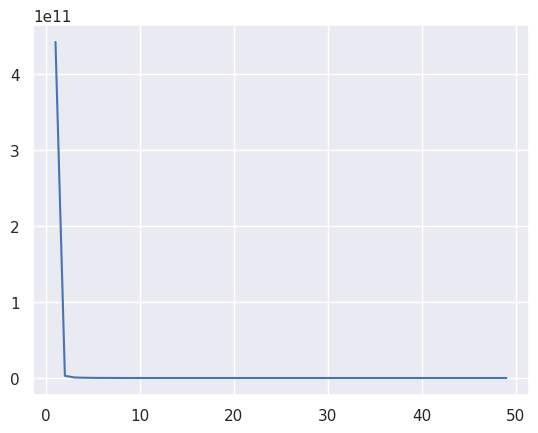

In [ ]:
sns.set()
plt.plot(range(1,50),total_wcss)
plt.show()

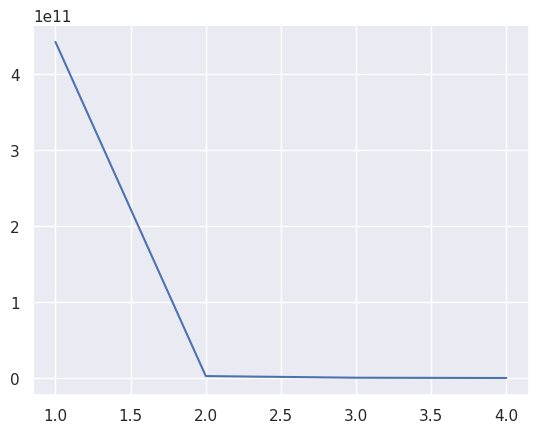

In [ ]:
sns.set()
plt.plot(range(1,5),total_wcss[:4])
plt.show()

In [ ]:
result=KMeans(23).fit(df)
identify_cluster=result.fit_predict(df)
df["cluster"]=identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["cluster"].value_counts()

cluster
1     85
2     78
5     76
21    52
14    50
13    45
18    41
0     37
8     37
7     35
4     35
6     31
3     21
9     18
19    16
17    15
20    11
15     8
11     3
22     2
16     2
12     1
10     1
Name: count, dtype: int64

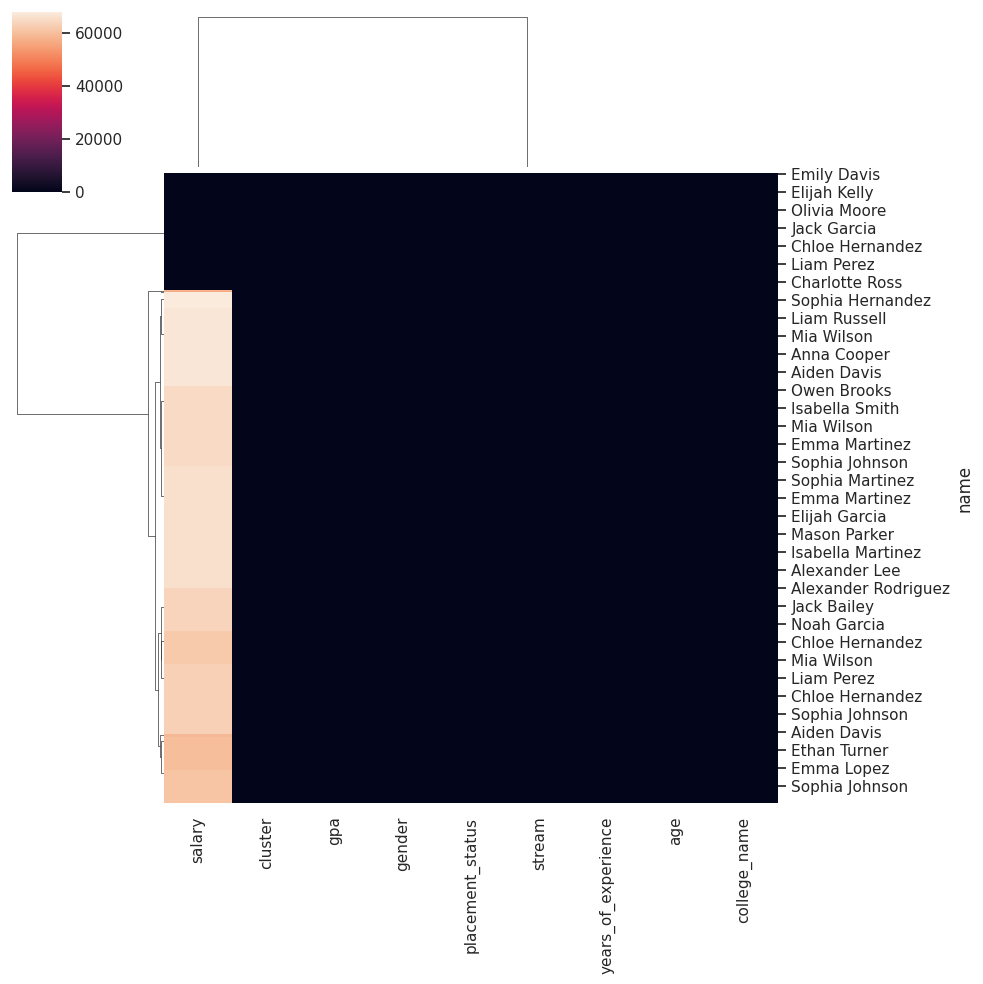

In [ ]:
sns.clustermap(df)

In [ ]:
df[df["cluster"]==1]


,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience,cluster
name,,,,,,,,,
Emily Davis,0.0,23,3.0,43.0,0.0,0,3.5,2.0,1
Isabella Perez,0.0,25,4.0,40.0,0.0,0,3.7,2.0,1
Elizabeth Wood,0.0,26,4.0,38.0,0.0,0,3.8,3.0,1
Grace Watson,0.0,24,0.0,31.0,0.0,0,3.8,3.0,1
Olivia Moore,0.0,25,0.0,26.0,0.0,0,3.6,1.0,1
...,...,...,...,...,...,...,...,...,...
Alexander Lee,1.0,26,3.0,32.0,0.0,0,3.6,1.0,1
Liam Perez,1.0,25,0.0,34.0,0.0,0,3.7,2.0,1
Emma Martinez,0.0,26,2.0,32.0,0.0,0,3.6,1.0,1
